In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [ ]:
# Importando arquivo externo para o colab (upload)
#from google.colab import files
#uploaded = files.upload()

base=pd.read_csv('drug200.csv')

In [ ]:
# Cria um objeto LabelEncoder
encoder = LabelEncoder()
print(base)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [7]:
# Separando a base em dados (x) e decisão (y)
x=base.iloc[:, :-1]
y=base.iloc[:, -1]

In [8]:
# Itera por meio de colunas de x e codifica se for do tipo de objeto
for column in x.columns:
    if x[column].dtype == 'object':  # Verifique se a coluna é do tipo objeto
        x[column] = encoder.fit_transform(x[column])  # Codificar a coluna

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

In [10]:
print(x_treino)
print(x_teste)

     Age  Sex  BP  Cholesterol  Na_to_K
45    66    0   2            1    8.107
75    26    1   1            1   20.909
54    68    0   0            1   10.189
25    28    0   0            1   18.809
191   23    1   0            0    8.011
..   ...  ...  ..          ...      ...
113   65    0   1            1   13.769
106   22    1   2            0   11.953
32    49    1   1            1   11.014
194   46    0   0            0   34.686
79    32    0   1            1   10.840

[120 rows x 5 columns]
     Age  Sex  BP  Cholesterol  Na_to_K
197   52    1   2            0    9.894
92    29    0   0            0   29.450
44    50    0   2            1   12.295
85    59    1   0            0   13.935
56    65    1   0            1   11.340
..   ...  ...  ..          ...      ...
175   73    0   0            0   18.348
8     60    1   2            0   15.171
163   21    0   0            1   28.632
149   22    1   1            0    8.151
35    46    1   2            1    7.285

[80 rows x 5 co

In [11]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred=model.predict(x_teste)
print(y_teste)

197    drugX
92     drugY
44     drugX
85     drugB
56     drugB
       ...  
175    drugY
8      drugY
163    drugY
149    drugC
35     drugX
Name: Drug, Length: 80, dtype: object


In [13]:
# Métricas de avaliação
print(metrics.classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        21
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [15]:
# Métricas de avaliação
print(metrics.confusion_matrix(y_teste, y_pred))

[[ 9  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 33]]


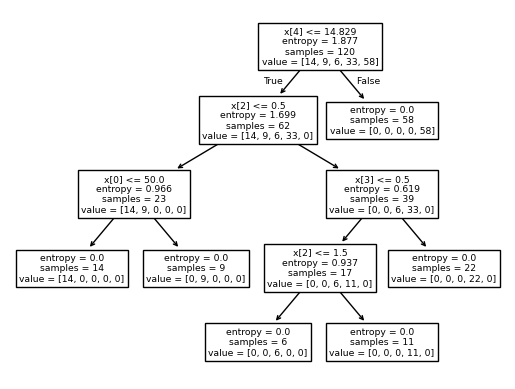

In [16]:
plt.show(tree.plot_tree(model))